In [1]:
imatlab_export_fig('print-svg')  % Static svg figures.

In [2]:
b = [1, 2, 3];
a = [1, 4, 5, 6];

In [3]:
q = [1, 2, 0];
r = [1, 0, 2, 0, 1];

In [4]:
z = [-1; -3];
p = [0; -2; -4];

In [5]:
K = 1;

In [6]:
G = zpk(z,p,K)


G =


   (s+1) (s+3)


  -------------


  s (s+2) (s+4)


Continuous-time zero/pole/gain model.



In [7]:
[num,den]=tfdata(G,'v')

num =
     0     1     4     3


den =
     1     6     8     0


In [8]:
G2=tf(num,den)


G2 =


    s^2 + 4 s + 3


  -----------------


  s^3 + 6 s^2 + 8 s


Continuous-time transfer function.



In [9]:
[zeros,poles,gain]=zpkdata(G2,'v')

zeros =
    -3
    -1


poles =
     0
    -4
    -2


gain =
     1


In [10]:
set(G,'inputname','Voltage','outputname','Angular Position');
G


G =


  From input "Voltage" to output "Angular Position":


   (s+1) (s+3)


  -------------


  s (s+2) (s+4)


Continuous-time zero/pole/gain model.



In [11]:
G3=zpk(z,p,K,'inputname','Armature Voltage (V)',... 
'outputname','Load Shaft Position (rad)',... 
'notes','An armature voltage controlled servomechanism')


G3 =


  From input "Armature Voltage (V)" to output "Load Shaft Position (rad)":


   (s+1) (s+3)


  -------------


  s (s+2) (s+4)


Continuous-time zero/pole/gain model.



In [12]:
get(G3,'notes')

ans =
  1x1 cell array
    {'An armature voltage controlled servomechanism'}


In [13]:
get(G3)

                Z: {[2x1 double]}
                P: {[3x1 double]}
                K: 1
    DisplayFormat: 'roots'
         Variable: 's'
          IODelay: 0
       InputDelay: 0
      OutputDelay: 0
               Ts: 0
         TimeUnit: 'seconds'
        InputName: {'Armature Voltage (V)'}
        InputUnit: {''}
       InputGroup: [1x1 struct]
       OutputName: {'Load Shaft Position (rad)'}
       OutputUnit: {''}
      OutputGroup: [1x1 struct]
            Notes: {'An armature voltage controlled servomechanism'}
         UserData: []
             Name: ''
     SamplingGrid: [1x1 struct]


In [14]:
G4 = zpk(G2)


G4 =


   (s+3) (s+1)


  -------------


  s (s+4) (s+2)


Continuous-time zero/pole/gain model.



In [15]:
G5 = tf(G)


G5 =


  From input "Voltage" to output "Angular Position":


    s^2 + 4 s + 3


  -----------------


  s^3 + 6 s^2 + 8 s


Continuous-time transfer function.



In [16]:
G1=tf([1 1],[1 3]);
G2=tf(10,conv([1 0],[1 2])); % conv is polynomial multiplication
Gs=G1*G2 % series connection of two sys objects


Gs =


      10 s + 10


  -----------------


  s^3 + 5 s^2 + 6 s


Continuous-time transfer function.



In [17]:
Gp = G1 + G2


Gp =


  s^3 + 3 s^2 + 12 s + 30


  -----------------------


     s^3 + 5 s^2 + 6 s


Continuous-time transfer function.



In [18]:
G = tf([2 5 1],[1 2 3],'inputname','torque',...
'outputname','velocity');
H = zpk(-2,-10,5);
Gc = feedback(G,H) % negative feedback assumed


Gc =


  From input "torque" to output "velocity":


  0.18182 (s+0.2192) (s+2.281) (s+10)


  -----------------------------------


   (s+3.419) (s^2 + 1.763s + 1.064)


Continuous-time zero/pole/gain model.



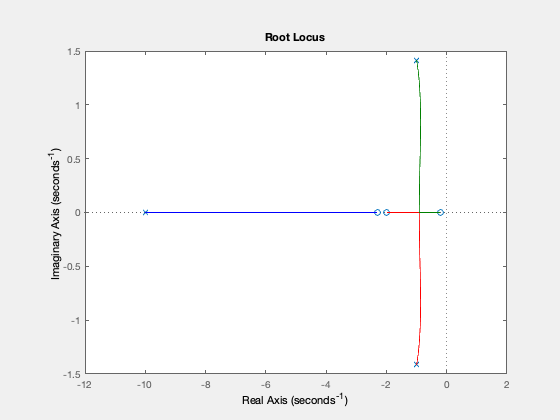

In [19]:
rlocus(G*H) % root locus 

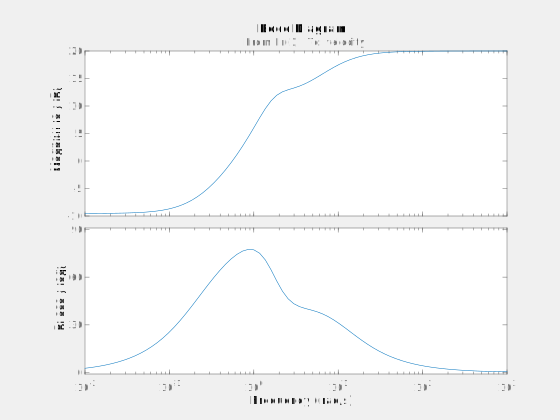

In [20]:
bode(G*H)% open-loop frequency response 

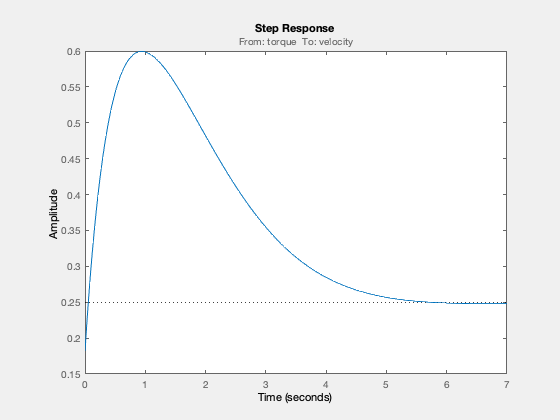

In [21]:
step(Gc) % closed-loop step response

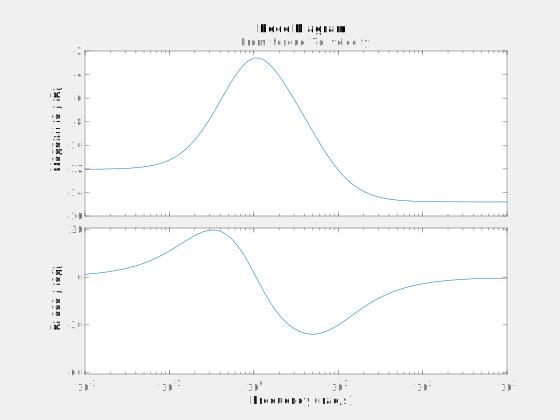

In [22]:
bode(Gc) % closed-loop frequency response

In [23]:
k = 5; z = [-2]; p = [0; -3; -10]; % zero-pole-gain form 
C = zpk(z,p,k); 
[num,den] = tfdata(C,'v')

num =
     0     0     5    10


den =
     1    13    30     0


In [24]:
[r,p,k] = residue(num,den)

r =
   -0.5714
    0.2381
    0.3333


p =
   -10
    -3
     0


k =
     []



newC =


     5 s + 10


  ---------------


  s^2 + 13 s + 30


Continuous-time transfer function.



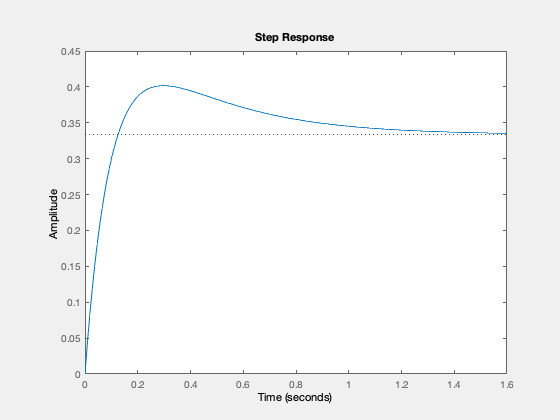

In [25]:
newC = tf([5, 10],[1, 13, 30])
step(newC)

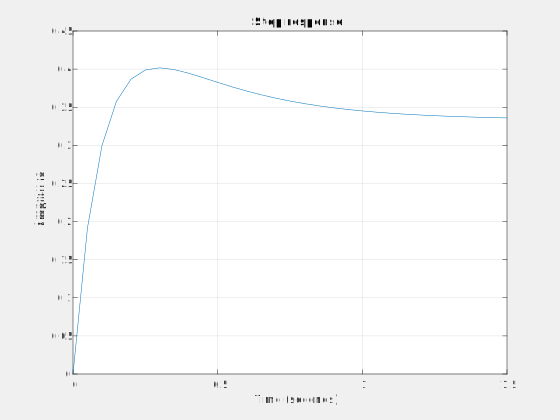

In [26]:
t = 0:.05:1.5; % time vector 
c = 0.3333 + 0.2381 * exp(-3*t) - 0.5714 * exp(-10*t);
plot(t,c),...
title('Step response'),...
xlabel('Time (seconds)'),...
ylabel('Amplitude'),...
grid